In [25]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [26]:
df = pd.read_csv('data/penguins_simple.csv', sep=';')
df.head(3)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE


## Intro: Solve the tasks

In [27]:
# convert body mass to kg
df['kilos'] = df['Body Mass (g)'] / 1_000

In [28]:
# convert gender to a Boolean
df['female'] = pd.factorize(df['Sex'])[0]

In [29]:
df['male'] = df['Sex'].replace({'MALE': 1, 'FEMALE': 0})

In [30]:
# df['Sex'] == 'FEMALE'

In [31]:
# calculate log of culmen length
import math

df['log_culmen'] = df['Culmen Length (mm)'].apply(math.log)

In [32]:
# combine species and gender into one column
df['genderspecies'] = df['Species'].str[:3] + '_' + df['Sex'].str[0]

In [33]:
df.head(3)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,kilos,female,male,log_culmen,genderspecies
0,Adelie,39.1,18.7,181.0,3750.0,MALE,3.75,0,1,3.666122,Ade_M
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,3.80,1,0,3.676301,Ade_F
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,3.25,1,0,3.696351,Ade_F


<AxesSubplot:xlabel='kilos', ylabel='log_culmen'>

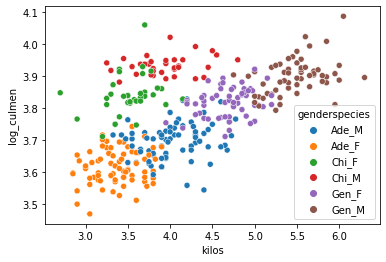

In [47]:
sns.scatterplot(data=df, x='kilos', y='log_culmen', hue='genderspecies')

## Why Feature Engineering?

* LogReg input are multiple columns (features)
* LogReg assigns one coefficient per feature
* --> number and kind of features determines power of the model
* more features -> more information -> better predictions
* kind: features should contain useful information, and not be redundant
* all features have to be floating-point numbers

Feature Engineering is creating columns (features) that make the model better.

### 1. Imputation

replace empty values by non-empty values

In [23]:
# introduce missing values
import numpy as np

df.iloc[3:10, 3] = np.NaN

In [53]:
df.head(5)

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,kilos,female,male,log_culmen,genderspecies
0,Adelie,39.1,18.7,181.0,3750.0,MALE,3.75,0,1,3.666122,Ade_M
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,3.80,1,0,3.676301,Ade_F
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,3.25,1,0,3.696351,Ade_F
3,Adelie,36.7,19.3,NaN,3450.0,FEMALE,3.45,1,0,3.602777,Ade_F
4,Adelie,39.3,20.6,NaN,3650.0,MALE,3.65,0,1,3.671225,Ade_M


<AxesSubplot:>

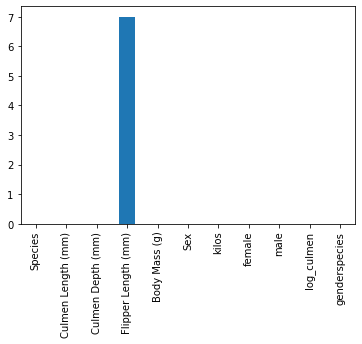

In [52]:
df.isna().sum().plot.bar() # checks for missing values

In [55]:
# df.dropna() # <-- not that useful

In [57]:
df['flipper_new'] = df['Flipper Length (mm)'].fillna(0.0) # zero, mean, random, median, backfill/forwardfill/interpolation (time series) 

In [65]:
mean = df['Flipper Length (mm)'].mean()   # often also median
df['flipper_new'] = df['Flipper Length (mm)'].fillna(mean)
df[['Flipper Length (mm)', 'flipper_new']].head(5)

,Flipper Length (mm),flipper_new
0,181.0,181.000000
1,186.0,186.000000
2,195.0,195.000000
3,NaN,201.202454
4,NaN,201.202454


In [69]:
df.groupby('genderspecies')['Flipper Length (mm)'].mean()

genderspecies
Ade_F    187.900000
Ade_M    192.347826
Chi_F    191.735294
Chi_M    199.911765
Gen_F    212.706897
Gen_M    221.540984
Name: Flipper Length (mm), dtype: float64

In [71]:
# very powerful imputation strategy!!
groupmeans = df.groupby('genderspecies')['Flipper Length (mm)'].transform('mean') # number of rows stays the same
df['Flipper Length (mm)'].fillna(groupmeans)

# in the Titanic data, do not use the Survived column for imputation

0      181.000000
1      186.000000
2      195.000000
3      187.900000
4      192.347826
          ...    
328    214.000000
329    215.000000
330    222.000000
331    212.000000
332    213.000000
Name: Flipper Length (mm), Length: 333, dtype: float64

### 2. One-Hot-Encoding
**Dummy Encoding**

In [34]:
# categorical column --> numbers
pd.get_dummies(df['genderspecies'])

,Ade_F,Ade_M,Chi_F,Chi_M,Gen_F,Gen_M
0,0,1,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
328,0,0,0,0,1,0
329,0,0,0,0,1,0
330,0,0,0,0,0,1
331,0,0,0,0,1,0


In [35]:
df = df.join(pd.get_dummies(df.genderspecies))
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,kilos,female,male,log_culmen,genderspecies,Ade_F,Ade_M,Chi_F,Chi_M,Gen_F,Gen_M
0,Adelie,39.1,18.7,181.0,3750.0,MALE,3.750,0,1,3.666122,Ade_M,0,1,0,0,0,0
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE,3.800,1,0,3.676301,Ade_F,1,0,0,0,0,0
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE,3.250,1,0,3.696351,Ade_F,1,0,0,0,0,0
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE,3.450,1,0,3.602777,Ade_F,1,0,0,0,0,0
4,Adelie,39.3,20.6,190.0,3650.0,MALE,3.650,0,1,3.671225,Ade_M,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE,4.925,1,0,3.854394,Gen_F,0,0,0,0,1,0
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE,4.850,1,0,3.845883,Gen_F,0,0,0,0,1,0
330,Gentoo,50.4,15.7,222.0,5750.0,MALE,5.750,0,1,3.919991,Gen_M,0,0,0,0,0,1
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE,5.200,1,0,3.811097,Gen_F,0,0,0,0,1,0


### 3. Binning

*reduces the amount of information: scalar -> category*

In [92]:
pd.cut(df['Body Mass (g)'], bins=[0, 1000, 3000, 10000], labels=['light', 'medium', 'heavy'], ) 

0      heavy
1      heavy
2      heavy
3      heavy
4      heavy
       ...  
328    heavy
329    heavy
330    heavy
331    heavy
332    heavy
Name: Body Mass (g), Length: 333, dtype: category
Categories (3, object): ['light' < 'medium' < 'heavy']

In [87]:
pd.cut(df['Body Mass (g)'], bins=3, labels=['light', 'medium', 'heavy'])  # same bin size

0       light
1       light
2       light
3       light
4       light
        ...  
328    medium
329    medium
330     heavy
331     heavy
332     heavy
Name: Body Mass (g), Length: 333, dtype: category
Categories (3, object): ['light' < 'medium' < 'heavy']

In [86]:
pd.qcut(df['Body Mass (g)'], q=3)  # quantiles -> same number of penguins in each bin

0        (3700.0, 4550.0]
1        (3700.0, 4550.0]
2      (2699.999, 3700.0]
3      (2699.999, 3700.0]
4      (2699.999, 3700.0]
              ...        
328      (4550.0, 6300.0]
329      (4550.0, 6300.0]
330      (4550.0, 6300.0]
331      (4550.0, 6300.0]
332      (4550.0, 6300.0]
Name: Body Mass (g), Length: 333, dtype: category
Categories (3, interval[float64]): [(2699.999, 3700.0] < (3700.0, 4550.0] < (4550.0, 6300.0]]

In [88]:
bins = pd.cut(df['Body Mass (g)'], bins=3, labels=['light', 'medium', 'heavy'])
pd.get_dummies(bins)

,light,medium,heavy
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
328,0,1,0
329,0,1,0
330,0,0,1
331,0,0,1


### 4. Scaling

*features being on different scales is usually bad for the model*

In [93]:
# Min-Max Scaling: smallest value is 0, highest value is 1.0

<AxesSubplot:>

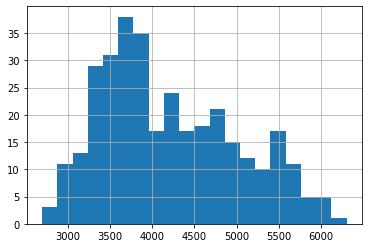

In [100]:
df['Body Mass (g)'].hist(bins=20)

In [95]:
weight_range = df['Body Mass (g)'].max() - df['Body Mass (g)'].min()
weight_range

3600.0

<AxesSubplot:>

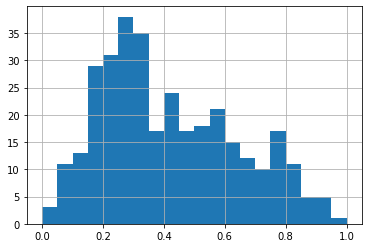

In [101]:
# x-axis changed
scaled = (df['Body Mass (g)'] - df['Body Mass (g)'].min() ) / weight_range
scaled.hist(bins=20)